Import libraries

In [312]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

Import data 

In [313]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
test_ids = data_test['PassengerId']
data_train.head()
data_test.head()
data_train.info()
data_train.describe() # For some rows in Age and Cabin columns there are nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


How many women survived?

In [314]:
women = data_train.loc[data_train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


How many men survived?

In [315]:
men = data_train.loc[data_train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)
print('% of women who survived: ', rate_men)

% of women who survived:  0.18890814558058924


The pie chart

Text(0.5, 1.0, 'The comparison of number of people who survived based on gender')

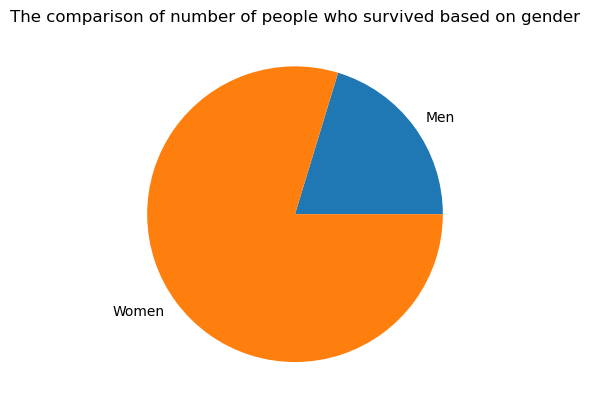

In [316]:
values = [rate_men, rate_women]
labels = ['Men', "Women"]
plt.pie(values, labels= labels)
plt.title('The comparison of number of people who survived based on gender')

Eliminate NaN values 

In [317]:

def clean(data):

    data['Age'] = data['Age'].fillna(29.0) # This is the average age taken from data_train.describe()
    
    data['Embarked'] = data['Embarked'].fillna('U')
    return data

data_train = clean(data_train)
data_test = clean(data_test)


Drop some columns 

In [318]:
data_train = data_train.drop(['Cabin','PassengerId', 'Ticket', 'Name', 'Fare'],axis =1 )
data_test = data_test.drop(['Cabin','PassengerId', 'Ticket', 'Name', 'Fare'],axis =1 )
data_train.head()

data_train.info()
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


Training process

In [319]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

cols = ['Sex', 'Embarked']

for col in cols:
     data_train[col] = le.fit_transform(data_train[col])
     data_test[col] = le.transform(data_test[col])
     
X = data_train.drop('Survived', axis = 1)
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Logistic Regression Model

In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train.head()
clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)


0.7541899441340782

Submission

In [323]:
submission_predicts = clf.predict(data_test)
print(len(y_test))
print(len(y_pred))
output = pd.DataFrame({'PassengerId': test_ids.values, 'Survived': submission_predicts})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

179
179
Your submission was successfully saved!
